In [22]:
import numpy as np
import skfuzzy as fuzz
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
file_path = '.\dataset\jazz\out.jazz'
data = np.loadtxt(file_path, delimiter='\t', dtype=int)
data

array([[  1,  10],
       [  1,  11],
       [  1,  12],
       ...,
       [187, 189],
       [188, 189],
       [193, 194]])

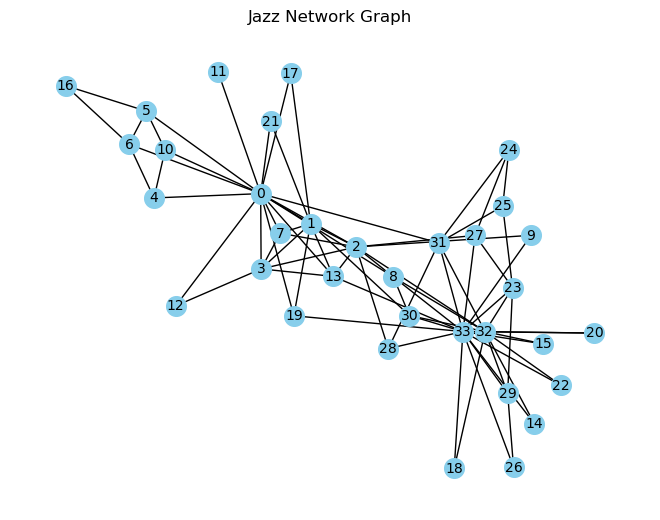

In [24]:
#Show Graph relations
G = nx.Graph()
for x, y in data:
    G.add_edge(x, y)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10)
plt.title('Jazz Network Graph')
plt.show()   

In [25]:
def run_fcm(data, n_clusters):
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data.T, n_clusters, 2, error=0.005, maxiter=1000)
    return cntr, u

In [26]:
#cluster count
n_clusters = 2

#FCM
cntr, u = run_fcm(data, n_clusters)

AttributeError: 'Graph' object has no attribute 'T'

In [7]:
columns =[]
for i in range(n_clusters):
    columns.append("Cluster_"+str(i))

df_centroid = pd.DataFrame(cntr.T, columns=columns)

print("Centroids:")
df_centroid

Centroids:


,Cluster_0,Cluster_1
0,99.465954,32.716088
1,143.814280,77.017400


In [10]:
df_membership = pd.DataFrame(u.T, columns=columns)
print("Membership Values:")

df_membership

Membership Values:


,Cluster_0,Cluster_1
0,0.166085,0.833915
1,0.164046,0.835954
2,0.161999,0.838001
3,0.159944,0.840056
4,0.157881,0.842119
...,...,...
2737,0.794044,0.205956
2738,0.789777,0.210223
2739,0.789262,0.210738
2740,0.787678,0.212322


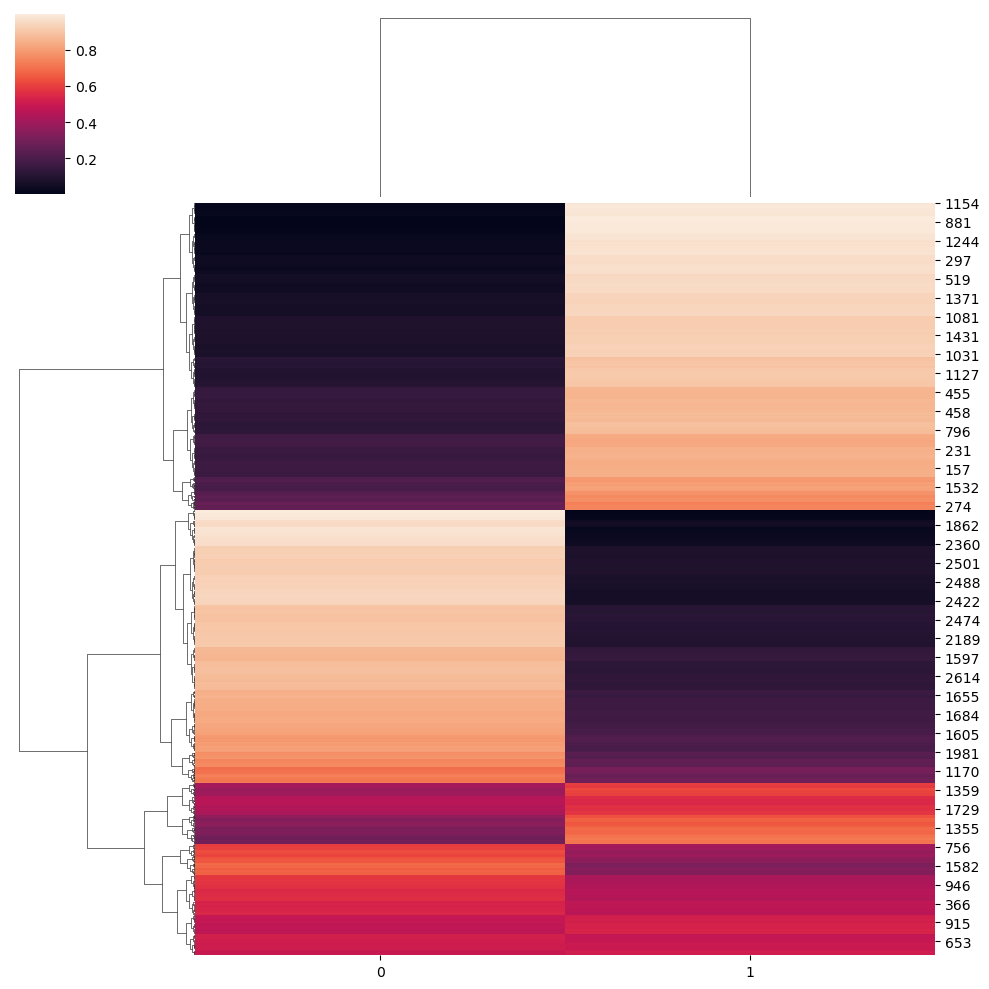

In [11]:
sns.clustermap(u.T)


In [21]:
cluster_membership = np.argmax(u, axis=0)

[1 1 1 ... 0 0 0]


c:\ProgramData\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


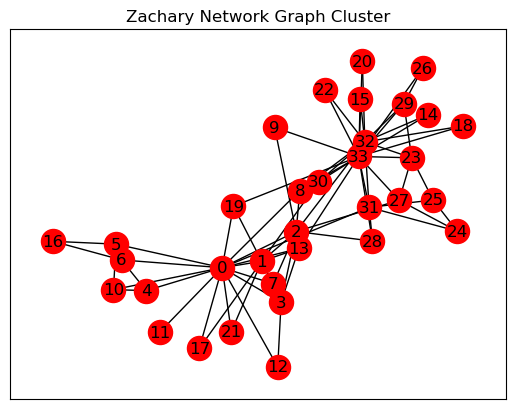

In [20]:
fig, ax = plt.subplots()


plt.title('Fuzzy C-Means Clustering on Jazz Dataset')

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

for j in range(n_clusters):
    ax.scatter(data[cluster_membership == j, 0], data[cluster_membership == j, 1],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()